<a href="https://colab.research.google.com/github/salahagnir/CA2/blob/main/ML_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRISP-DM Framework.

To address these multifaceted challenges, this analysis will be structured around the CRISP-DM framework. This structured approach will guide the systematic exploration, data preprocessing, model development, evaluation, and deployment phases, ensuring a comprehensive and methodical examination of the dataset.


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#warnings
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv('/content/drive/MyDrive/CA2/TII01.20231126154500.csv')
df2 = pd.read_csv('/content/drive/MyDrive/CA2/TOA11.20231218135730.csv')

In [108]:
df

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,Weeks of the year,UNIT,VALUE
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Week 01,Number,549533.0
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Week 02,Number,839022.0
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Week 03,Number,819359.0
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Week 04,Number,860745.0
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Week 05,Number,912795.0
...,...,...,...,...,...,...,...,...,...,...
790,TII01C01,Passenger Journeys,2023,2023,2,Green line,49,Week 49,Number,NaN
791,TII01C01,Passenger Journeys,2023,2023,2,Green line,50,Week 50,Number,NaN
792,TII01C01,Passenger Journeys,2023,2023,2,Green line,51,Week 51,Number,NaN
793,TII01C01,Passenger Journeys,2023,2023,2,Green line,52,Week 52,Number,NaN


In [109]:
df2

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,01,January,Number,1664495
1,TOA11C01,Red line,2018,2018,02,February,Number,1657562
2,TOA11C01,Red line,2018,2018,03,March,Number,1661098
3,TOA11C01,Red line,2018,2018,04,April,Number,1794424
4,TOA11C01,Red line,2018,2018,05,May,Number,1934553
...,...,...,...,...,...,...,...,...
190,TOA11C03,All Luas lines,2022,2022,09,September,Number,3811093
191,TOA11C03,All Luas lines,2022,2022,10,October,Number,4219124
192,TOA11C03,All Luas lines,2022,2022,11,November,Number,4375705
193,TOA11C03,All Luas lines,2022,2022,12,December,Number,4030698


In [110]:
# Creating DataFrames
df1 = pd.DataFrame(df)
df2 = pd.DataFrame(df2)

In [111]:

df2 = df2.rename(columns={'TLIST(A1)': 'TLIST(W1)', 'C01885V02316': 'C03132V03784', 'Month': 'Weeks of the year'})

# Merging DataFrames based on common columns
df = pd.concat([df1, df2], ignore_index=True)

print(df)

    STATISTIC     Statistic Label  TLIST(W1)  Year C03132V03784  \
0    TII01C01  Passenger Journeys       2019  2019            -   
1    TII01C01  Passenger Journeys       2019  2019            -   
2    TII01C01  Passenger Journeys       2019  2019            -   
3    TII01C01  Passenger Journeys       2019  2019            -   
4    TII01C01  Passenger Journeys       2019  2019            -   
..        ...                 ...        ...   ...          ...   
985  TOA11C03      All Luas lines       2022  2022           09   
986  TOA11C03      All Luas lines       2022  2022           10   
987  TOA11C03      All Luas lines       2022  2022           11   
988  TOA11C03      All Luas lines       2022  2022           12   
989  TOA11C03      All Luas lines       2022  2022            -   

          Luas Line  C01198V01436 Weeks of the year    UNIT       VALUE  
0    All Luas lines           1.0           Week 01  Number    549533.0  
1    All Luas lines           2.0           Wee

In [112]:
df2 = pd.read_csv('/content/drive/MyDrive/CA2/Spain.csv')

In [113]:
df1 = pd.DataFrame(df2)

# Melt the DataFrame
df1_melted = pd.melt(df1, id_vars=['Código', 'Etiqueta', 'Denominación'],
                     var_name='Year', value_name='VALUE')

# Extract the year from the 'Year' column
df1_melted['Year'] = df1_melted['Year'].str.extract('(\d+)', expand=False)

# Display the melted DataFrame
print("Melted DataFrame:")
print(df1_melted)

print(df1)

Melted DataFrame:
      Código Etiqueta                                      Denominación  Year  \
0          1        1                 PLAZA DE CRISTO REY - PROSPERIDAD  2014   
1          2        2  PLAZA DE MANUEL BECERRA - AVENIDA REINA VICTORIA  2014   
2          3        3             PUERTA DE TOLEDO - PLAZA DE SAN AMARO  2014   
3          4        4        PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA  2014   
4          5        5    PUERTA DEL SOL/SEVILLA - ESTACION DE CHAMARTIN  2014   
...      ...      ...                                               ...   ...   
2416     788       SE                          ATOCHA RENFE - RECOLETOS  2022   
2417     796       SE                           METROPOLITANO - MONCLOA  2022   
2418     797       SE                    ALAMEDA DE OSUNA - TORRE ARIAS  2022   
2419     798       SE      METROPOLITANO-CIUDAD UNIVERSITARIA - MONCLOA  2022   
2420     799       SE                       MAR DE CRISTAL - VALDEBEBAS  2022   

        V

In [114]:
df2 = (df1_melted)
df2

,Código,Etiqueta,Denominación,Year,VALUE
0,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2014,2503450
1,2,2,PLAZA DE MANUEL BECERRA - AVENIDA REINA VICTORIA,2014,3764122
2,3,3,PUERTA DE TOLEDO - PLAZA DE SAN AMARO,2014,3065657
3,4,4,PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA,2014,2457707
4,5,5,PUERTA DEL SOL/SEVILLA - ESTACION DE CHAMARTIN,2014,1974948
...,...,...,...,...,...
2416,788,SE,ATOCHA RENFE - RECOLETOS,2022,0
2417,796,SE,METROPOLITANO - MONCLOA,2022,0
2418,797,SE,ALAMEDA DE OSUNA - TORRE ARIAS,2022,0
2419,798,SE,METROPOLITANO-CIUDAD UNIVERSITARIA - MONCLOA,2022,0


In [115]:
pip install dash

In [116]:
import dash
from dash import dcc, html

In [117]:
print(df2.columns)

Index(['Código', 'Etiqueta', 'Denominación', 'Year', 'VALUE'], dtype='object')


In [118]:
print(df.columns)

Index(['STATISTIC', 'Statistic Label', 'TLIST(W1)', 'Year', 'C03132V03784',
       'Luas Line', 'C01198V01436', 'Weeks of the year', 'UNIT', 'VALUE'],
      dtype='object')


In [119]:
df1 = pd.DataFrame(df2)
df2 = pd.DataFrame(df)

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Comparison Dashboard"),
    html.Div([
        dcc.Graph(
            id='bar-chart',
            figure={
                'data': [
                    {'x': df1['Year'], 'y': df1['VALUE'], 'type': 'bar', 'name': 'Madrid'},
                    {'x': df2['Year'], 'y': df2['VALUE'], 'type': 'bar', 'name': 'Dublin'}
                ],
                'layout': {
                    'title': 'Comparison of Values by Dublin and Madrid'
                }
            }
        )
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [120]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
STATISTIC             0.000000
Statistic Label       0.000000
TLIST(W1)             0.000000
Year                  0.000000
C03132V03784          0.000000
Luas Line            19.696970
C01198V01436         19.696970
Weeks of the year     0.000000
UNIT                  0.000000
VALUE                 5.151515
dtype: float64


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          990 non-null    object 
 1   Statistic Label    990 non-null    object 
 2   TLIST(W1)          990 non-null    int64  
 3   Year               990 non-null    int64  
 4   C03132V03784       990 non-null    object 
 5   Luas Line          795 non-null    object 
 6   C01198V01436       795 non-null    float64
 7   Weeks of the year  990 non-null    object 
 8   UNIT               990 non-null    object 
 9   VALUE              939 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 77.5+ KB


In [122]:
# Remove rows with any missing values
df.dropna(inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 780
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          744 non-null    object 
 1   Statistic Label    744 non-null    object 
 2   TLIST(W1)          744 non-null    int64  
 3   Year               744 non-null    int64  
 4   C03132V03784       744 non-null    object 
 5   Luas Line          744 non-null    object 
 6   C01198V01436       744 non-null    float64
 7   Weeks of the year  744 non-null    object 
 8   UNIT               744 non-null    object 
 9   VALUE              744 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 63.9+ KB


In [124]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [125]:
# Remove rows with any missing values
df.dropna(inplace=True)

In [126]:
# Convert 'Weeks of the year' column to extract numerical week information
df['Numerical_Week'] = df['Weeks of the year'].str.extract('(\d+)').astype(int)

In [127]:
columns_to_drop = ['STATISTIC','Statistic Label','TLIST(W1)','C03132V03784', 'C01198V01436','UNIT','Weeks of the year']

In [128]:
# Drop the columns that are not needed
df = df.drop(columns=columns_to_drop, axis=1)

In [129]:
df.head()

,Year,Luas Line,VALUE,Numerical_Week
0,2019,All Luas lines,549533.0,1
1,2019,All Luas lines,839022.0,2
2,2019,All Luas lines,819359.0,3
3,2019,All Luas lines,860745.0,4
4,2019,All Luas lines,912795.0,5


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 780
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            744 non-null    int64  
 1   Luas Line       744 non-null    object 
 2   VALUE           744 non-null    float64
 3   Numerical_Week  744 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 29.1+ KB


In [131]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Luas Line' column
df['Luas Line Encoded'] = label_encoder.fit_transform(df['Luas Line'])

In [132]:
df

,Year,Luas Line,VALUE,Numerical_Week,Luas Line Encoded
0,2019,All Luas lines,549533.0,1,0
1,2019,All Luas lines,839022.0,2,0
2,2019,All Luas lines,819359.0,3,0
3,2019,All Luas lines,860745.0,4,0
4,2019,All Luas lines,912795.0,5,0
...,...,...,...,...,...
776,2023,Green line,411878.0,35,1
777,2023,Green line,432905.0,36,1
778,2023,Green line,445474.0,37,1
779,2023,Green line,498593.0,38,1


The code snippet employs LabelEncoder from sklearn.preprocessing to convert categorical data in the 'Luas Line' column into numeric representations. This transformation is essential for machine learning as it allows algorithms to interpret and analyze categorical information effectively. The resulting 'Luas Line Encoded' column displays numerical labels corresponding to different 'Luas Line' categories. For example, 'All Luas lines' might be represented as '0', while 'Green line' could be represented as '1'. This numeric encoding facilitates model training and analysis by converting categorical variables into a format suitable for machine learning algorithms.


In [133]:
columns_to_drop = ['Luas Line']

In [134]:
# Drop the columns that are not needed
df = df.drop(columns=columns_to_drop, axis=1)

In [135]:
df.head(20)

,Year,VALUE,Numerical_Week,Luas Line Encoded
0,2019,549533.0,1,0
1,2019,839022.0,2,0
2,2019,819359.0,3,0
3,2019,860745.0,4,0
4,2019,912795.0,5,0
5,2019,912612.0,6,0
6,2019,940476.0,7,0
7,2019,952291.0,8,0
8,2019,929391.0,9,0
9,2019,941919.0,10,0


In [136]:
pip install statsmodels

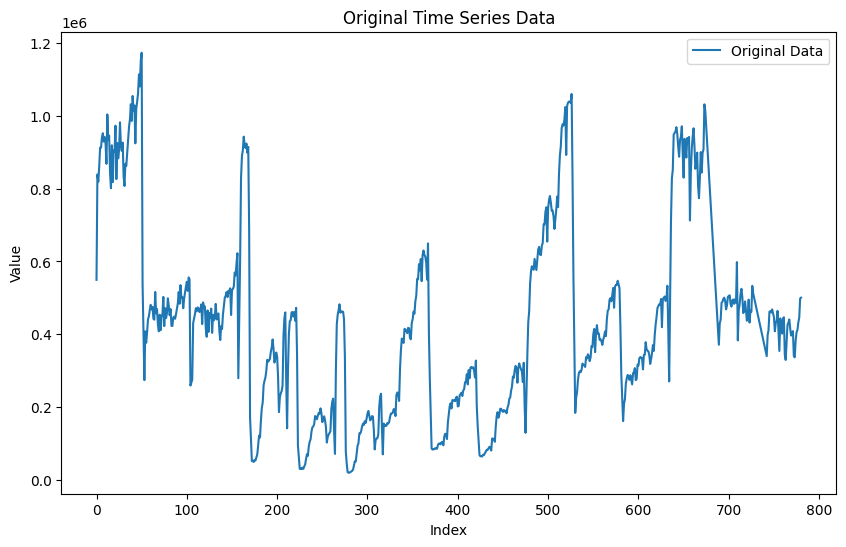

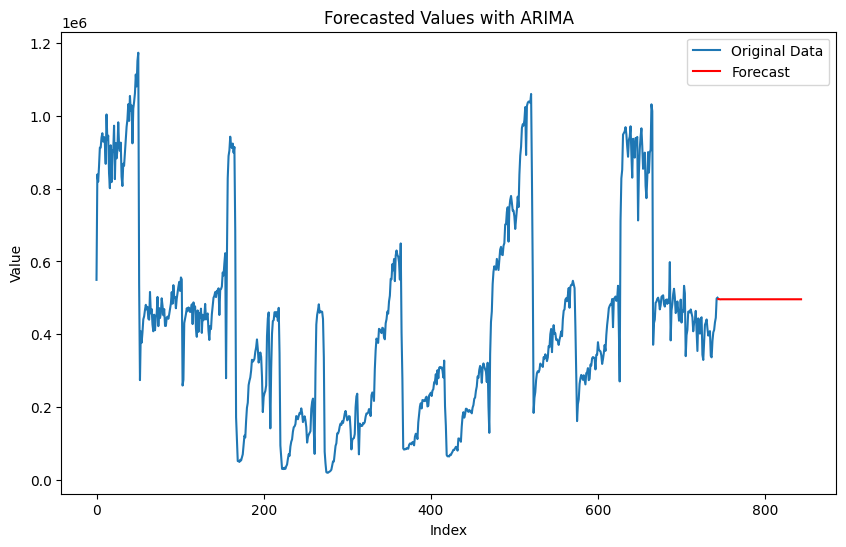

In [137]:

from statsmodels.tsa.arima.model import ARIMA

# Considering 'VALUE' as the column you want to forecast
ts = df['VALUE']

# Fit an ARIMA model
model = ARIMA(ts, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Forecast future values - Increase the number of future steps
future_steps = 100  # Number of future steps to forecast
forecast = model_fit.forecast(steps=future_steps)

# Visualize the original time series data
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Data')
plt.title('Original Time Series Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Visualize the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(ts)), ts, label='Original Data')
plt.plot(range(len(ts), len(ts) + future_steps), forecast, label='Forecast', color='red')
plt.title('Forecasted Values with ARIMA')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

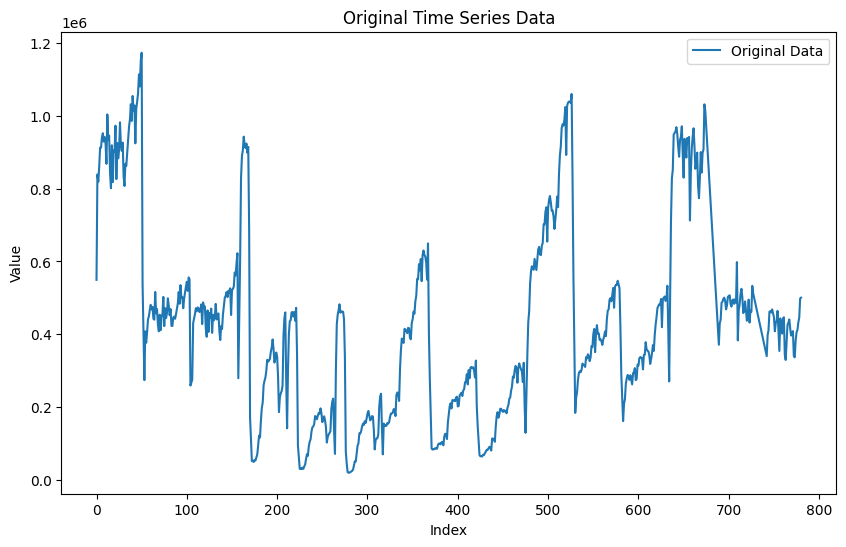

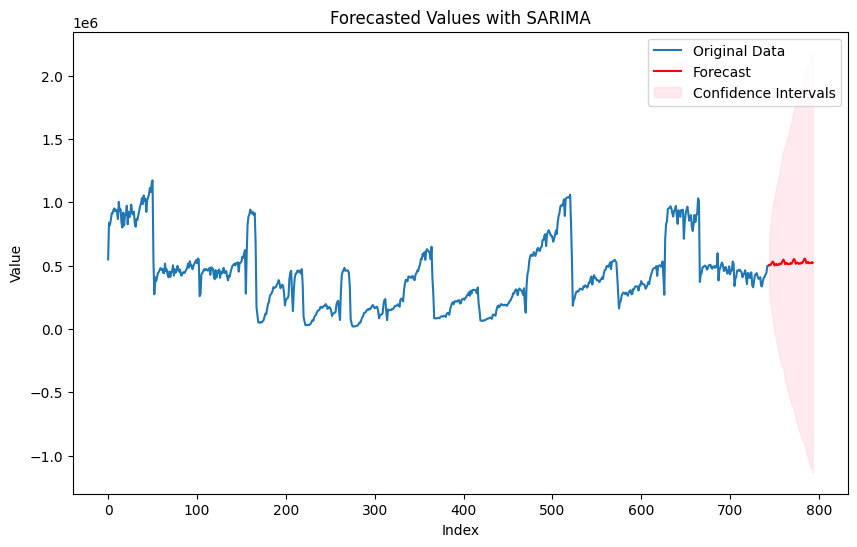

In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX



# Considering 'VALUE' as the column you want to forecast
ts = df['VALUE']

# Fit a SARIMA model
order = (1, 1, 1)  # Specify the (p, d, q) parameters
seasonal_order = (1, 1, 1, 12)  # Specify the seasonal (P, D, Q, S) parameters
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecast future values
future_steps = 50  # Number of future steps to forecast
forecast = model_fit.get_forecast(steps=future_steps)

# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Visualize the original time series data
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Data')
plt.title('Original Time Series Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Visualize the forecasted values and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(range(len(ts)), ts, label='Original Data')
plt.plot(range(len(ts), len(ts) + future_steps), forecast_values, label='Forecast', color='red')
plt.fill_between(range(len(ts), len(ts) + future_steps),
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('Forecasted Values with SARIMA')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

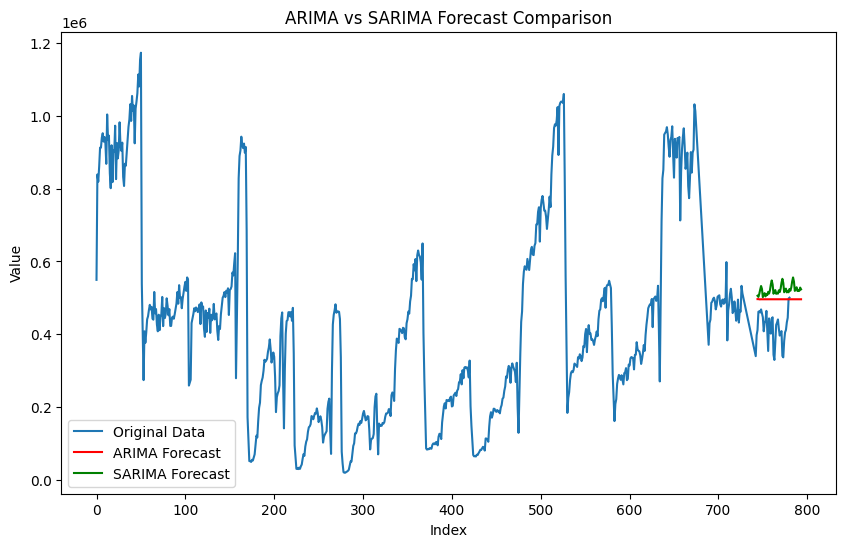

In [139]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX



ts = df['VALUE']

# Fit an ARIMA model
arima_model = ARIMA(ts, order=(5, 1, 0))  # ARIMA(p, d, q) - Adjust order as needed
arima_model_fit = arima_model.fit()

# Forecast with ARIMA
future_steps = 50  # Number of future steps to forecast
arima_forecast = arima_model_fit.forecast(steps=future_steps)

# Fit a SARIMA model
order = (1, 1, 1)  # Specify the (p, d, q) parameters
seasonal_order = (1, 1, 1, 12)  # Specify the seasonal (P, D, Q, S) parameters
sarima_model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Forecast with SARIMA
sarima_forecast = sarima_model_fit.get_forecast(steps=future_steps).predicted_mean

# Visualize the forecasts
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Data')
plt.plot(range(len(ts), len(ts) + future_steps), arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(range(len(ts), len(ts) + future_steps), sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [140]:
# Display the column names in your DataFrame
print(df.columns)

Index(['Year', 'VALUE', 'Numerical_Week', 'Luas Line Encoded'], dtype='object')


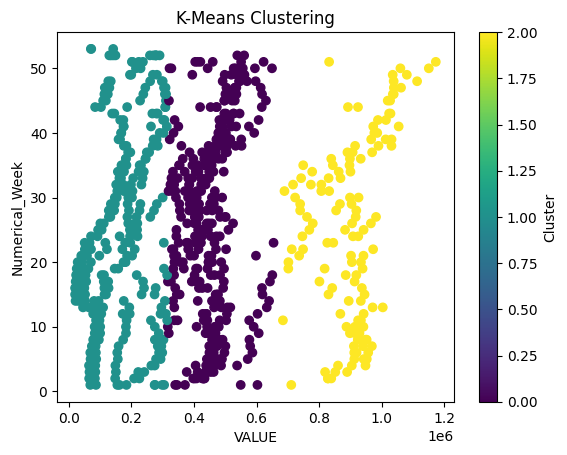

   Year     VALUE  Numerical_Week  Luas Line Encoded  Cluster
0  2019  549533.0               1                  0        0
1  2019  839022.0               2                  0        2
2  2019  819359.0               3                  0        2
3  2019  860745.0               4                  0        2
4  2019  912795.0               5                  0        2


In [141]:
from sklearn.cluster import KMeans
# Selecting numerical columns for clustering
numerical_cols = ['Year', 'VALUE', 'Numerical_Week', 'Luas Line Encoded']

# Initialize KMeans with the desired number of clusters
num_clusters = 3  # You can change the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the selected columns
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])

# Visualizing the clusters (for two features at a time, e.g., 'VALUE' and 'Numerical_Week')
plt.scatter(df['VALUE'], df['Numerical_Week'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('VALUE')
plt.ylabel('Numerical_Week')
plt.colorbar(label='Cluster')
plt.show()

# Displaying modified DataFrame with the 'Cluster' column
print(df.head())

The provided code utilizes K-Means clustering to group similar data points based on selected numerical columns. It helps in identifying inherent patterns or similarities within the data and visualizes these clusters in a scatter plot. Understanding these clusters aids in recognizing data similarities, segmentation, and decision-making based on shared characteristics among data points.

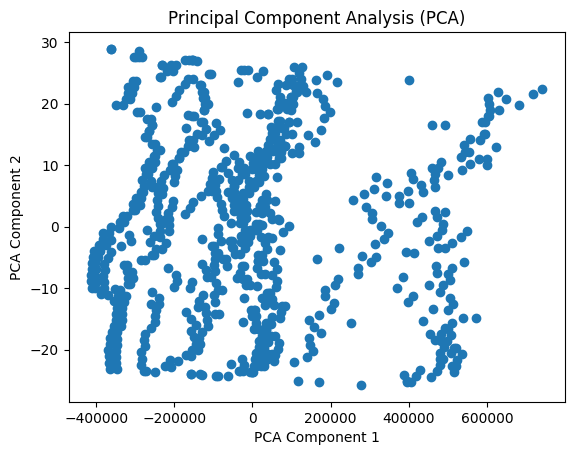

     Year     VALUE  Numerical_Week  Luas Line Encoded  Cluster  \
0  2019.0  549533.0             1.0                0.0      0.0   
1  2019.0  839022.0             2.0                0.0      2.0   
2  2019.0  819359.0             3.0                0.0      2.0   
3  2019.0  860745.0             4.0                0.0      2.0   
4  2019.0  912795.0             5.0                0.0      2.0   

   PCA_Component_1  PCA_Component_2  
0    116928.432696       -25.035101  
1    406417.432697       -25.200949  
2    386754.432702       -24.121828  
3    428140.432705       -23.288554  
4    480190.432709       -22.498225  


In [142]:
from sklearn.decomposition import PCA
# Selecting numerical columns for PCA
numerical_cols = ['Year', 'VALUE', 'Numerical_Week', 'Luas Line Encoded']
# Initialize PCA with the number of components
num_components = 2  # You can change the number of components as needed
pca = PCA(n_components=num_components)
# Fit PCA to the selected columns
pca_result = pca.fit_transform(df[numerical_cols])

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_result, columns=['PCA_Component_1', 'PCA_Component_2'])

# Concatenate the PCA components with the original DataFrame
df = pd.concat([df, pca_df], axis=1)
# Visualize PCA components
plt.scatter(df['PCA_Component_1'], df['PCA_Component_2'])
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
# Displaying modified DataFrame with PCA components
print(df.head())

The code performs Principal Component Analysis (PCA) on selected numerical columns from the dataset, creating two new components that capture the most important information. It visualizes these components in a scatter plot, offering insights into how data points are distributed in a reduced two-dimensional space. This aids in understanding data patterns and reducing the dataset's dimensionality for analysis.

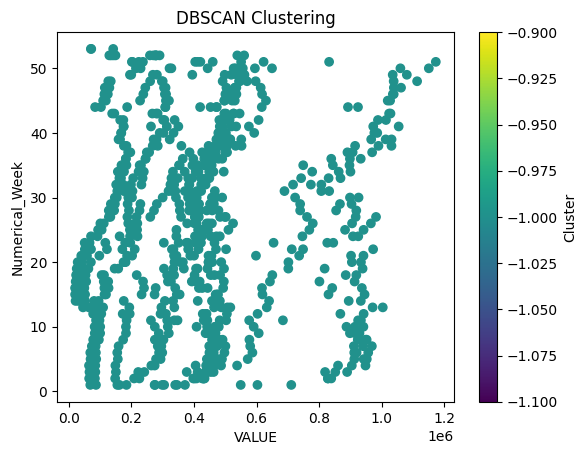

     Year     VALUE  Numerical_Week  Luas Line Encoded  Cluster  \
0  2019.0  549533.0             1.0                0.0      0.0   
1  2019.0  839022.0             2.0                0.0      2.0   
2  2019.0  819359.0             3.0                0.0      2.0   
3  2019.0  860745.0             4.0                0.0      2.0   
4  2019.0  912795.0             5.0                0.0      2.0   

   PCA_Component_1  PCA_Component_2  DBSCAN_Cluster  
0    116928.432696       -25.035101              -1  
1    406417.432697       -25.200949              -1  
2    386754.432702       -24.121828              -1  
3    428140.432705       -23.288554              -1  
4    480190.432709       -22.498225              -1  


In [143]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN

# Selecting numerical columns for clustering
numerical_cols = ['Year', 'VALUE', 'Numerical_Week', 'Luas Line Encoded']

# Extracting the numerical data for clustering
data_for_clustering = df[numerical_cols]

# Handling missing values by imputing with the mean value
imputer = SimpleImputer(strategy='mean')
data_for_clustering_imputed = imputer.fit_transform(data_for_clustering)

# Initializing DBSCAN with appropriate parameters (eps and min_samples)
eps_val = 0.5  # Adjust this value based on the density of your data
min_samples_val = 5  # Adjust the minimum number of samples based on your data size

dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)

# Fit DBSCAN to the imputed data
cluster_labels = dbscan.fit_predict(data_for_clustering_imputed)

# Adding cluster labels to the DataFrame
df['DBSCAN_Cluster'] = cluster_labels

# Visualizing the clusters (for two features at a time, e.g., 'VALUE' and 'Numerical_Week')
plt.scatter(df['VALUE'], df['Numerical_Week'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('VALUE')
plt.ylabel('Numerical_Week')
plt.colorbar(label='Cluster')
plt.show()

# Displaying modified DataFrame with 'DBSCAN_Cluster' column
print(df.head())

This code snippet demonstrates how DBSCAN, an unsupervised clustering algorithm, has been used to identify clusters within the numerical columns ('Year', 'VALUE', 'Numerical_Week', 'Luas Line Encoded') of the dataset. It has been used to handle missing values, perform clustering, assign cluster labels to data points, visualize the clusters, and add a new column 'DBSCAN_Cluster' to the DataFrame indicating the cluster label for each data point.

In [144]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN


# Handling missing values in the dataset
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

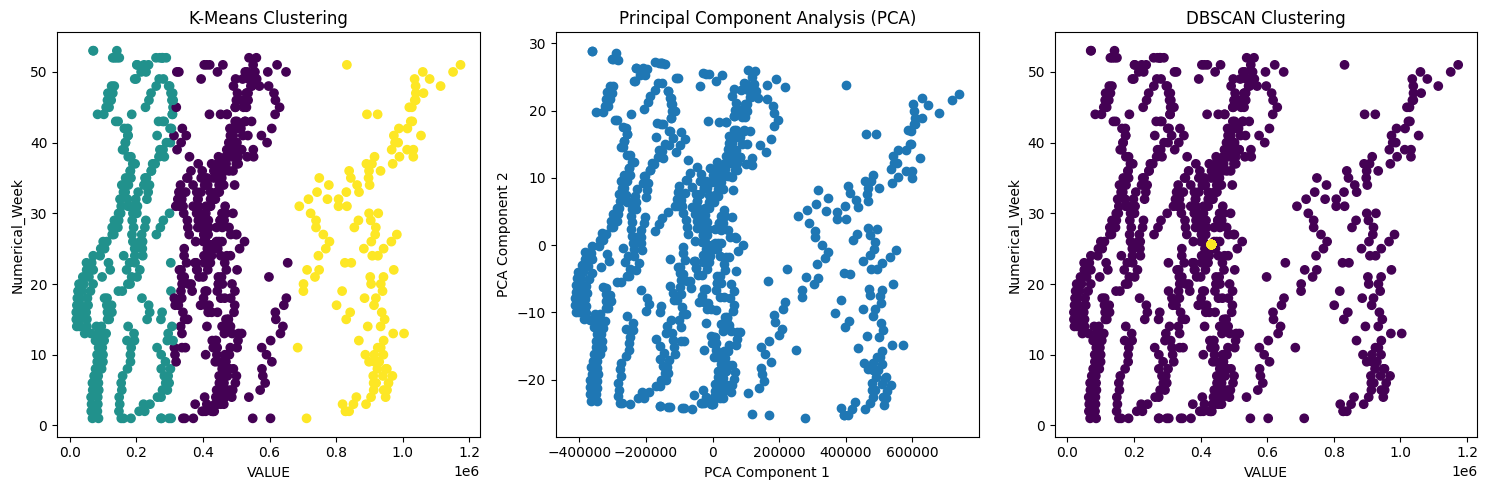

In [145]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN


# Selecting numerical columns for clustering and PCA
numerical_cols = ['Year', 'VALUE', 'Numerical_Week', 'Luas Line Encoded']

# ----- K-Means Clustering -----
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df[numerical_cols])

# ----- PCA -----
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numerical_cols])
df['PCA_Component_1'] = pca_result[:, 0]
df['PCA_Component_2'] = pca_result[:, 1]

# ----- DBSCAN -----
imputer = SimpleImputer(strategy='mean')
data_for_clustering = imputer.fit_transform(df[numerical_cols])
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_for_clustering)

# Plotting the clusters/components
plt.figure(figsize=(15, 5))

# K-Means Clustering plot
plt.subplot(1, 3, 1)
plt.scatter(df['VALUE'], df['Numerical_Week'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('VALUE')
plt.ylabel('Numerical_Week')

# PCA plot
plt.subplot(1, 3, 2)
plt.scatter(df['PCA_Component_1'], df['PCA_Component_2'])
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# DBSCAN Clustering plot
plt.subplot(1, 3, 3)
plt.scatter(df['VALUE'], df['Numerical_Week'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('VALUE')
plt.ylabel('Numerical_Week')

plt.tight_layout()
plt.show()

In [146]:
df

,Year,VALUE,Numerical_Week,Luas Line Encoded,Cluster,PCA_Component_1,PCA_Component_2,DBSCAN_Cluster,KMeans_Cluster
0,2019.000000,549533.000000,1.000000,0.0,0.0,116928.432696,-25.035101,-1,0
1,2019.000000,839022.000000,2.000000,0.0,2.0,406417.432697,-25.200949,-1,2
2,2019.000000,819359.000000,3.000000,0.0,2.0,386754.432702,-24.121828,-1,2
3,2019.000000,860745.000000,4.000000,0.0,2.0,428140.432705,-23.288554,-1,2
4,2019.000000,912795.000000,5.000000,0.0,2.0,480190.432709,-22.498225,-1,2
...,...,...,...,...,...,...,...,...,...
737,2020.891129,432604.567204,25.584677,1.0,NaN,0.000000,-0.000000,0,0
738,2020.891129,432604.567204,25.584677,1.0,NaN,0.000000,-0.000000,0,0
739,2020.891129,432604.567204,25.584677,1.0,NaN,0.000000,-0.000000,0,0
740,2020.891129,432604.567204,25.584677,1.0,NaN,0.000000,-0.000000,0,0


In [147]:
# Feature selection
X = df[['Year', 'Numerical_Week', 'Luas Line Encoded']]
y = df['VALUE']

In [148]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [150]:
# Choosing the model and defining hyperparameters grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    # Add more hyperparameters as needed for tuning
}

In [151]:
# Initialize the model
rf = RandomForestRegressor()

In [152]:
# Grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error')

In [153]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [154]:
# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 34280.20880305662


The code uses GridSearchCV to find the best hyperparameters for a Random Forest Regressor model. It then evaluates the model's performance on test data using the root mean squared error (RMSE) as a measure.

The RMSE of around 33953.18 represents the average difference between predicted and actual values. Lower RMSE indicates better predictive accuracy. Assessing the significance of this value depends on the problem's context and the target variable's scale. Comparing RMSE to the target variable's range helps gauge model accuracy and identifies potential areas for improvement.


In [155]:
# Calculate RMSE for the training set
train_pred = best_model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
print(f"Training RMSE: {train_rmse}")

Training RMSE: 21372.005965086428


In [156]:
from sklearn.metrics import r2_score

# Calculate R² for training and test sets
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, y_pred)
print(f"Training R²: {train_r2}")
print(f"Test R²: {test_r2}")

Training R²: 0.99315454464845
Test R²: 0.9822334665291701


In [157]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training and test sets
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

Training MAE: 10034.82589387472
Test MAE: 22139.763350569658


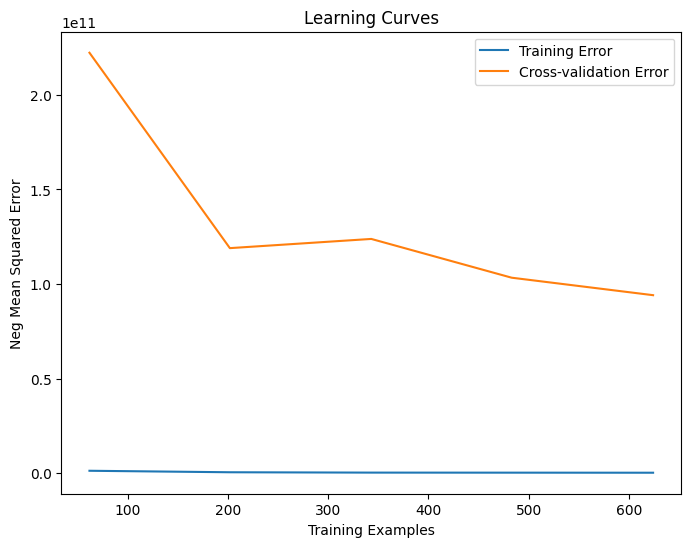

In [158]:
from sklearn.model_selection import learning_curve
# Use best_model or the model you want to evaluate
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Neg Mean Squared Error')

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation Error')

plt.legend()
plt.show()

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None)  # Use the best hyperparameters here

In [161]:
# Performing cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


In [162]:
# Calculating root mean squared error (RMSE) for cross-validation scores
rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE scores

In [163]:
# Print the RMSE scores for each fold
print("RMSE scores for each fold:", rmse_scores)

RMSE scores for each fold: [95706.2176997  48156.37211878 52294.49987839 45662.081207
 61834.77293014]


In [164]:
# Print the average RMSE score and its standard deviation
print(f"Average RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")

Average RMSE: 60730.7888 (+/- 18334.9518)


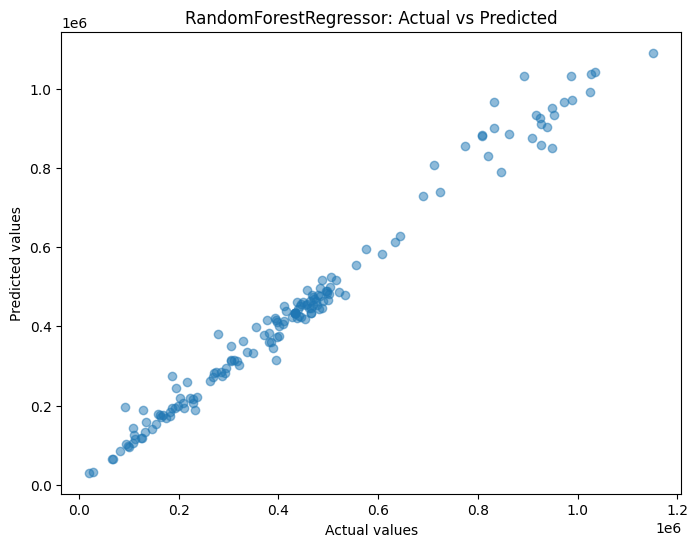

In [165]:

# Assuming y_test contains the actual target values from the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('RandomForestRegressor: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [166]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

In [167]:
# Initialize Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor()

In [168]:
# Fit the Gradient Boosting Regressor
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor()

In [169]:
# Predict using Gradient Boosting Regressor
y_pred_gb = gradient_boosting.predict(X_test)

In [170]:
# Calculate RMSE for Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print(f"Gradient Boosting Regressor RMSE: {rmse_gb}")

Gradient Boosting Regressor RMSE: 52541.291200754


In [171]:
# Predict on the training set
y_train_pred = gradient_boosting.predict(X_train)

# Predict on the test set
y_test_pred = gradient_boosting.predict(X_test)

In [172]:
# Calculate RMSE for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

# Calculate R² for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Training R²: {r2_train}")
print(f"Test R²: {r2_test}")

# Calculate MAE for training and test sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Training MAE: {mae_train}")
print(f"Test MAE: {mae_test}")

Training RMSE: 63352.80888193267
Test RMSE: 52541.291200754
Training R²: 0.9398489076237481
Test R²: 0.9582633810824236
Training MAE: 42141.648077916485
Test MAE: 38426.66427723477


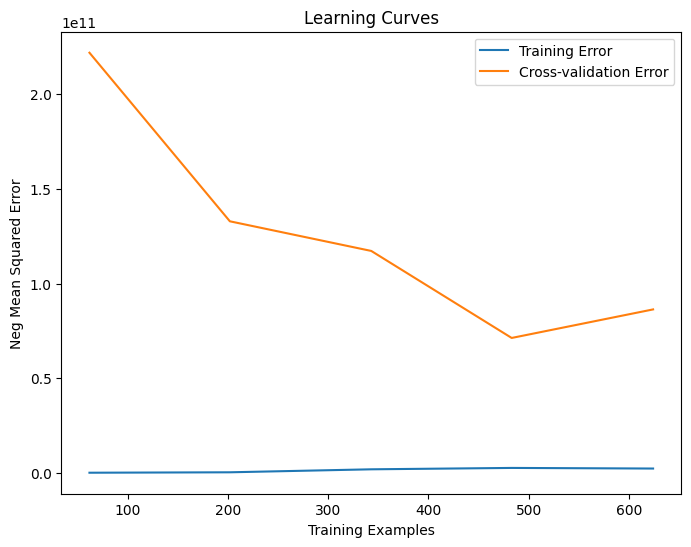

In [173]:

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(), X, y, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Neg Mean Squared Error')

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation Error')

plt.legend()
plt.show()

In [174]:
# Performing cross-validation
cv_scores_gb = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [175]:
# Calculating RMSE for cross-validation scores
rmse_scores_gb = np.sqrt(-cv_scores_gb)  # Calculate RMSE scores

In [176]:
# Print the RMSE scores for each fold
print("RMSE scores for each fold:", rmse_scores_gb)


RMSE scores for each fold: [93418.22592215 68476.78980849 84828.25451363 58222.61850277
 74481.34168414]


In [177]:
# Print the average RMSE score and its standard deviation
print(f"Average RMSE: {np.mean(rmse_scores_gb):.4f} (+/- {np.std(rmse_scores_gb):.4f})")

Average RMSE: 75885.4461 (+/- 12298.0272)


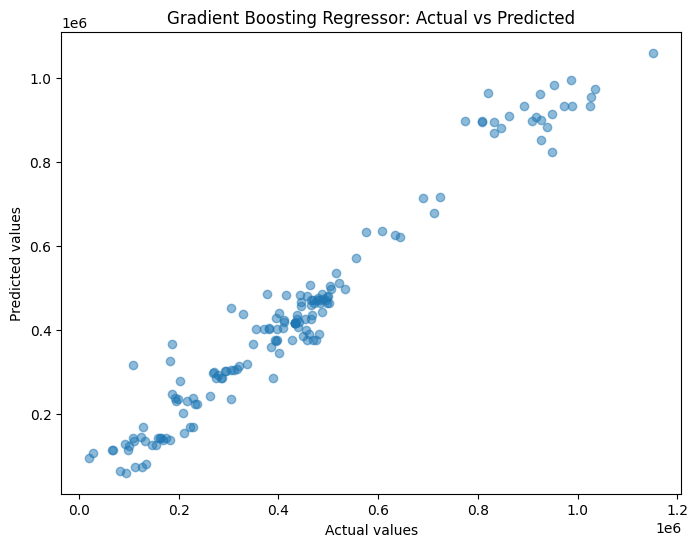

In [178]:
# Visualize Gradient Boosting Regressor predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.title('Gradient Boosting Regressor: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [179]:
# Initialize Support Vector Regressor (SVR)
svr = SVR()

In [180]:
# Fit the SVR
svr.fit(X_train, y_train)

# Predict using SVR
y_pred_svr = svr.predict(X_test)

In [181]:
# Calculate RMSE for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print(f"Support Vector Regressor RMSE: {rmse_svr}")

Support Vector Regressor RMSE: 257349.43257804346


In [182]:
# Performing cross-validation
cv_scores_svr = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [183]:
# Calculating RMSE for cross-validation scores
rmse_scores_svr = np.sqrt(-cv_scores_svr)  # Calculate RMSE scores


In [184]:
# Print the RMSE scores for each fold
print("RMSE scores for each fold:", rmse_scores_svr)


RMSE scores for each fold: [254996.24368926 256211.59901937 285914.76464957 231252.11485754
 262735.15218327]


In [185]:
# Print the average RMSE score and its standard deviation
print(f"Average RMSE: {np.mean(rmse_scores_svr):.4f} (+/- {np.std(rmse_scores_svr):.4f})")

Average RMSE: 258221.9749 (+/- 17487.5938)


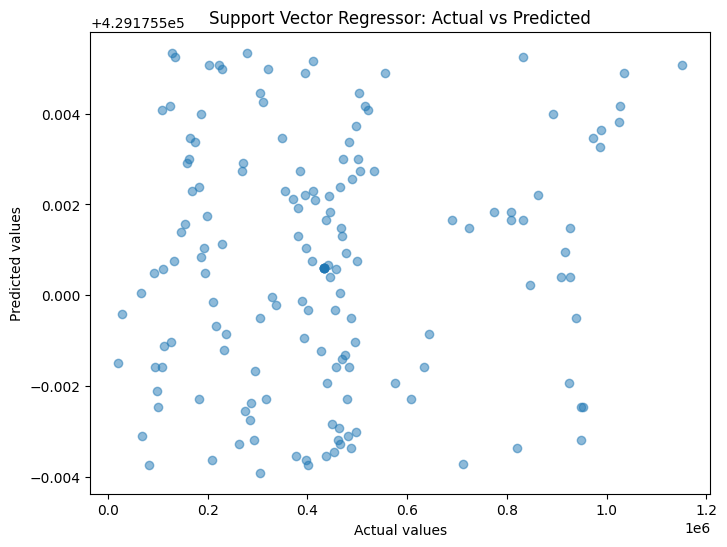

In [186]:
# Visualize SVR predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('Support Vector Regressor: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [187]:
y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr = svr.predict(X_test)

In [188]:
# Calculate MAE for SVR model predictions on the training set
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)

# Calculate MAE for SVR model predictions on the test set
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)

print(f"SVR Training MAE: {mae_train_svr}")
print(f"SVR Test MAE: {mae_test_svr}")

SVR Training MAE: 194873.76847564222
SVR Test MAE: 192728.0376869328


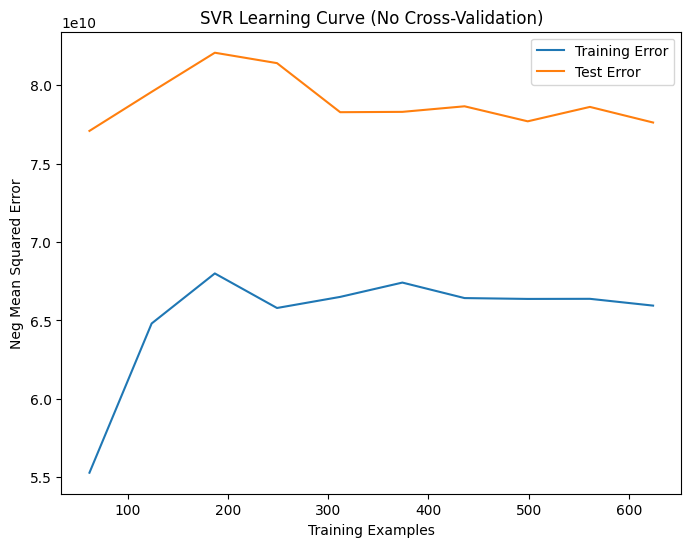

In [189]:
# Plotting learning curve for SVR without cross-validation
train_sizes_svr, train_scores_svr, test_scores_svr = learning_curve(
    SVR(), X, y, train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True,
    scoring='neg_mean_squared_error', cv=None)

train_scores_mean_svr = -train_scores_svr.mean(axis=1)
test_scores_mean_svr = -test_scores_svr.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.title('SVR Learning Curve (No Cross-Validation)')
plt.xlabel('Training Examples')
plt.ylabel('Neg Mean Squared Error')

plt.plot(train_sizes_svr, train_scores_mean_svr, label='Training Error')
plt.plot(train_sizes_svr, test_scores_mean_svr, label='Test Error')

plt.legend()
plt.show()

In [190]:

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [191]:
# Initialize Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

In [192]:
# Initialize Support Vector Regressor (SVR)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)

In [193]:
# RandomForestRegressor predictions (already trained)
y_pred_rf = best_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

In [194]:
# Create a bar plot
models = ['RandomForestRegressor', 'GradientBoostingRegressor', 'SupportVectorRegressor']
rmse_values = [rmse_rf, rmse_gb, rmse_svr]

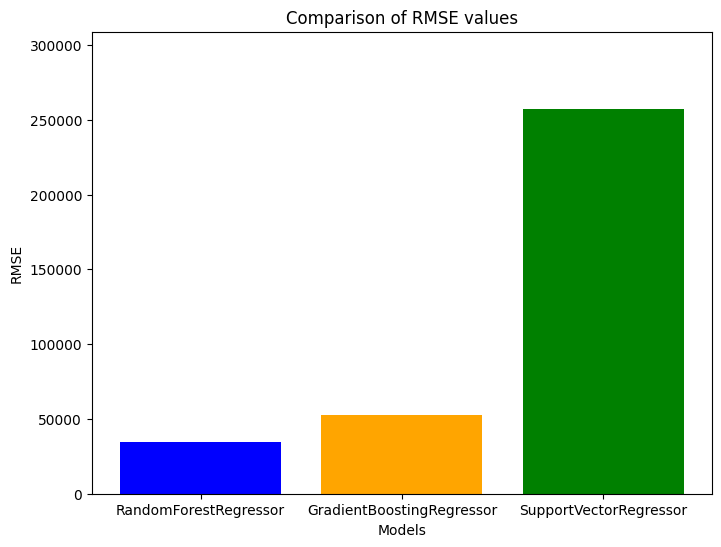

In [195]:
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
plt.title('Comparison of RMSE values')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) * 1.2)  # Set ylim for better visualization
plt.show()

This code segment compares the performance of three regression models (RandomForestRegressor, GradientBoostingRegressor, and SupportVectorRegressor) by calculating and visualizing their RMSE (Root Mean Squared Error) values on the test data. The resulting bar plot allows for a quick comparison of model performance, where lower RMSE values indicate better predictive accuracy.



In [196]:
#warnings
import warnings
warnings.filterwarnings('ignore')

import os
#dir_Path ='F:\\'
#os.chdir(dir_Path)

In [197]:
pip install praw

In [198]:
import praw

# Reddit API credentials (you need to create an app in Reddit to obtain these)
client_id = 'grPUEiWuAjhA3Et8c6Pn_Q'
client_secret = '62H9rNmzcWVjann8ZH3BCz2xYf-9mQ'
user_agent = 'CASalah'

# Initialize PRAW with your credentials
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

# URL of the Reddit post
post_url = 'https://www.reddit.com/r/Dublin/comments/12mbt0g/another_day_on_the_red_line_luas/'

# Fetch Reddit post data
try:
    submission = reddit.submission(url=post_url)

    # Print post title and content
    print(f"Post Title: {submission.title}\n")
    print(f"Post Content: {submission.selftext}\n")

    # Print comments
    print("Comments:")
    submission.comments.replace_more(limit=None)  # Retrieve all comments
    for comment in submission.comments.list():
        print(f"- {comment.body}\n")
except Exception as e:
    print(f"Error fetching Reddit post: {e}")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Post Title: Another day on the Red Line LUAS…

Post Content: This evening, as the tram was leaving Jervis, a guy was harassing another passenger who was seated behind him. The man got right up to the other passenger's ear and threatened him, saying, "D’ye wanna get shanked in the neck?" He was showboating to some boys in the seats next to him, who were lapping it up. I reported the incident by texting the anti-social behaviour line (51444).

Later, when the harassed passenger got off and was replaced by another passenger, the man flicked his ear and verbally abused him, making further threats. He then showed off a blade to the boys. I got off the tram and called the guards with the details.

Meanwhile, I noticed a woman across the tracks who was also being harassed by a man. She asked me for help, claiming that she didn't know him. I asked if everything was alright - he told me to "f*** off away," saying it was “between him and his woman”. They kept fighting and the woman spoke to him 

The code uses PRAW, a Python Reddit API Wrapper, to fetch and display information about a specified Reddit post. It retrieves the post's title, content, and comments, utilizing Reddit API credentials for authentication and interaction with Reddit's API.

In [199]:
import praw
from textblob import TextBlob

# Reddit API credentials
client_id = 'grPUEiWuAjhA3Et8c6Pn_Q'
client_secret = '62H9rNmzcWVjann8ZH3BCz2xYf-9mQ'
user_agent = 'CASalah'

# Initialize PRAW with your credentials
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent,
)

# URL of the Reddit post
post_url = 'https://www.reddit.com/r/Dublin/comments/12mbt0g/another_day_on_the_red_line_luas/'

# Create empty lists to store data
comments_list = []
sentiment_polarity = []
sentiment_subjectivity = []

# Fetch Reddit post data
try:
    submission = reddit.submission(url=post_url)

    # Perform sentiment analysis on post content
    post_blob = TextBlob(submission.selftext)
    post_sentiment = post_blob.sentiment
    print(f"Post Title: {submission.title}")
    print(f"Post Sentiment - Polarity: {post_sentiment.polarity}, Subjectivity: {post_sentiment.subjectivity}\n")

    # Append post sentiment to lists
    comments_list.append("Post")
    sentiment_polarity.append(post_sentiment.polarity)
    sentiment_subjectivity.append(post_sentiment.subjectivity)

    # Fetch comments and perform sentiment analysis
    submission.comments.replace_more(limit=None)  # Retrieve all comments
    for comment in submission.comments.list():
        comment_blob = TextBlob(comment.body)
        comment_sentiment = comment_blob.sentiment

        # Append comment sentiment to lists
        comments_list.append(comment.body)
        sentiment_polarity.append(comment_sentiment.polarity)
        sentiment_subjectivity.append(comment_sentiment.subjectivity)

except Exception as e:
    print(f"Error fetching Reddit post: {e}")

# Create a pandas DataFrame with sentiment analysis results
data = {
    'Text': comments_list,
    'Polarity': sentiment_polarity,
    'Subjectivity': sentiment_subjectivity
}

df = pd.DataFrame(data)

# Display sentiment analysis results in tabular format
print(df)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Post Title: Another day on the Red Line LUAS…
Post Sentiment - Polarity: 0.008523119392684613, Subjectivity: 0.4718599033816425

                                                 Text  Polarity  Subjectivity
0                                                Post  0.008523      0.471860
1   I think it's gotten bad especially in the past... -0.069167      0.387870
2   Red line is disgusting. Moved back to Dublin f... -0.060000      0.426667
3   **Update:** I received a call from An Garda Sí...  0.168750      0.287500
4   Not as bad obviously, but another thing I'm no... -0.093333      0.286667
5   Last time I was on the green line a woman spat... -0.075000      0.416667
6   The amount of anti social behaviour and just s... -0.075152      0.524697
7   Me and my friends had a glass bottle thrown at...  0.000000      0.000000
8   So kind of transport police would be ideal for...  0.750000      0.950000
9   Of all the public transport companies operatin... -0.033333      0.288889
10  I witness

The sentiment analysis findings for the Reddit post and comments are arranged neatly in a table. Each row in the table represents either the post or a comment. It shows the text, polarity score, and subjectivity score. The polarity score tells us how positive or negative the sentiment is, ranging from -1 (very negative) to 1 (very positive). Meanwhile, the subjectivity score indicates how much opinions or feelings are present in the text, from 0 (factual) to 1 (opinionated).

In [200]:
df.head()

,Text,Polarity,Subjectivity
0,Post,0.008523,0.471860
1,I think it's gotten bad especially in the past...,-0.069167,0.387870
2,Red line is disgusting. Moved back to Dublin f...,-0.060000,0.426667
3,**Update:** I received a call from An Garda Sí...,0.168750,0.287500
4,"Not as bad obviously, but another thing I'm no...",-0.093333,0.286667


The DataFrame df.head() presents sentiment analysis results, showcasing the text, sentiment polarity, and subjectivity scores for the first few entries (rows) extracted from the Reddit post and comments.

The Polarity is our target in this data.
We will train the model which can tell us from the the text wheter negative or positive revew

In [201]:
df.shape

(52, 3)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Text          52 non-null     object 
 1   Polarity      52 non-null     float64
 2   Subjectivity  52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


Data Cleaning/EDA

In [203]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Text            0.0
Polarity        0.0
Subjectivity    0.0
dtype: float64


There are no missing values

In [204]:
#Apply first level cleaning
import re
import string

#This function conver to lower-case, removes square brackets, romoves numbers and punctiuation
def text_clean_1(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

cleaned1 = lambda x: text_clean_1(x)

Clean and standardize text data for better analysis or natural language processing tasks.

In [205]:
#
df['cleaned_text']= pd.DataFrame(df.Text.apply(cleaned1))
df.head(10)

,Text,Polarity,Subjectivity,cleaned_text
0,Post,0.008523,0.471860,post
1,I think it's gotten bad especially in the past...,-0.069167,0.387870,i think its gotten bad especially in the past ...
2,Red line is disgusting. Moved back to Dublin f...,-0.060000,0.426667,red line is disgusting moved back to dublin fr...
3,**Update:** I received a call from An Garda Sí...,0.168750,0.287500,update i received a call from an garda síochán...
4,"Not as bad obviously, but another thing I'm no...",-0.093333,0.286667,not as bad obviously but another thing im noti...
5,Last time I was on the green line a woman spat...,-0.075000,0.416667,last time i was on the green line a woman spat...
6,The amount of anti social behaviour and just s...,-0.075152,0.524697,the amount of anti social behaviour and just s...
7,Me and my friends had a glass bottle thrown at...,0.000000,0.000000,me and my friends had a glass bottle thrown at...
8,So kind of transport police would be ideal for...,0.750000,0.950000,so kind of transport police would be ideal for...
9,Of all the public transport companies operatin...,-0.033333,0.288889,of all the public transport companies operatin...


The provided code snippet performs text cleaning on a DataFrame column called 'Text'. It converts the text to lowercase, removes square brackets, eliminates punctuation, and gets rid of numbers. These cleaning steps aim to preprocess text data, making it more uniform and suitable for natural language processing or machine learning tasks where such clean text data is often needed for effective analysis or model training and creat new column called cleaned_text generated by the function.

In [206]:
import re

def text_clean_2(text):
    text = re.sub('["“”...]', '', text)  # Remove quotes, ellipses, and other specified characters
    text = re.sub('\n', '', text)       # Remove newline characters
    return text

cleaned2 = lambda x: text_clean_2(x)

In [207]:
df['cleaned_text_new'] = pd.DataFrame(df['cleaned_text'].apply(cleaned2))
df

,Text,Polarity,Subjectivity,cleaned_text,cleaned_text_new
0,Post,0.008523,0.471860,post,post
1,I think it's gotten bad especially in the past...,-0.069167,0.387870,i think its gotten bad especially in the past ...,i think its gotten bad especially in the past ...
2,Red line is disgusting. Moved back to Dublin f...,-0.060000,0.426667,red line is disgusting moved back to dublin fr...,red line is disgusting moved back to dublin fr...
3,**Update:** I received a call from An Garda Sí...,0.168750,0.287500,update i received a call from an garda síochán...,update i received a call from an garda síochán...
4,"Not as bad obviously, but another thing I'm no...",-0.093333,0.286667,not as bad obviously but another thing im noti...,not as bad obviously but another thing im noti...
5,Last time I was on the green line a woman spat...,-0.075000,0.416667,last time i was on the green line a woman spat...,last time i was on the green line a woman spat...
6,The amount of anti social behaviour and just s...,-0.075152,0.524697,the amount of anti social behaviour and just s...,the amount of anti social behaviour and just s...
7,Me and my friends had a glass bottle thrown at...,0.000000,0.000000,me and my friends had a glass bottle thrown at...,me and my friends had a glass bottle thrown at...
8,So kind of transport police would be ideal for...,0.750000,0.950000,so kind of transport police would be ideal for...,so kind of transport police would be ideal for...
9,Of all the public transport companies operatin...,-0.033333,0.288889,of all the public transport companies operatin...,of all the public transport companies operatin...


The provided code defines a second-level cleaning function deep clean (`cleaned_text_new
`) that removes quotes, ellipses, and newline characters from the 'cleaned_text' column. It then applies this function to create a new column named 'cleaned_text_new' in the DataFrame (`df`) using Pandas.


In [208]:
unique_values = df['cleaned_text_new'].unique()

# Display the unique values
print(unique_values)

['post'
 'i think its gotten bad especially in the past few months i get it a lot and ive never seen as much as i have recently yesterday morning i went in to town with my four month old and got the luas home it was about  in the afternoon and a man was walking the carriages getting in everybodys face i was baby wearing and he really got in my face and kept mocking  gesturing like he was trying to grab the baby i was so scared and my heart was racing on the one hand i understand why everyone on there looked the other way because they were scared too but on the other hand ive genuinely never felt so vulnerable in broad daylight like that i got off at the next stop made sure he didnt and walked home'
 'red line is disgusting moved back to dublin from a very deprived area of manchester and it doesn’t even come close i routinely see violence and sexual assault and almost always nobody ever helps there’s a hammered scumbag that gets on at jervis every day and spits in peoples faces'
 'updat

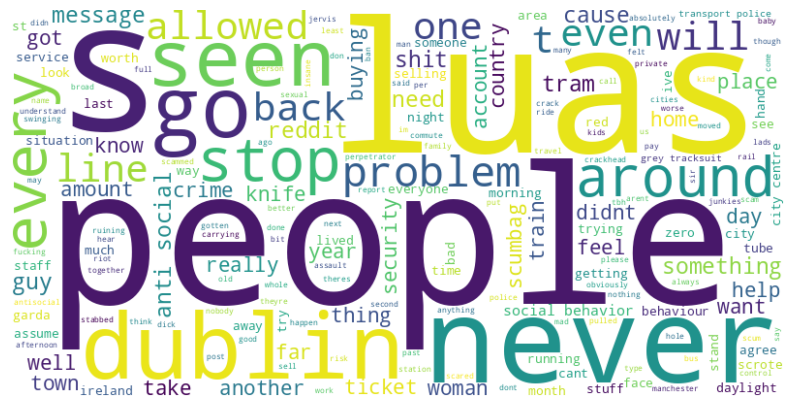

In [209]:
from wordcloud import WordCloud
# Assuming unique_values contains the unique text values from the 'cleaned_text_new' column
unique_values = df['cleaned_text_new'].unique()

# Combine the unique values into a single string
text_combined = ' '.join(unique_values)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The code collects all unique text values from the 'cleaned_text_new' column, combining them into a single string. It then generates a word cloud where words that appear more frequently across these unique texts will appear larger in the visualization. Larger words like Problem Luas people indicate higher occurrence, highlighting prominent themes or sentiments present in the text data. Conversely, smaller words occur less often and may not stand out as prominently in the word cloud.

In [210]:
# Adding a new column based on Polarity
df['Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

df.head()

,Text,Polarity,Subjectivity,cleaned_text,cleaned_text_new,Sentiment
0,Post,0.008523,0.471860,post,post,positive
1,I think it's gotten bad especially in the past...,-0.069167,0.387870,i think its gotten bad especially in the past ...,i think its gotten bad especially in the past ...,negative
2,Red line is disgusting. Moved back to Dublin f...,-0.060000,0.426667,red line is disgusting moved back to dublin fr...,red line is disgusting moved back to dublin fr...,negative
3,**Update:** I received a call from An Garda Sí...,0.168750,0.287500,update i received a call from an garda síochán...,update i received a call from an garda síochán...,positive
4,"Not as bad obviously, but another thing I'm no...",-0.093333,0.286667,not as bad obviously but another thing im noti...,not as bad obviously but another thing im noti...,negative


The code snippet adds a new column 'Sentiment' to the DataFrame. It assigns sentiment labels ('positive', 'negative', or 'neutral') based on the 'Polarity' values: 'positive' for positive polarity, 'negative' for negative polarity, and 'neutral' for zero polarity. This process categorizes sentiments for each entry in the DataFrame.

Percentage for default

positive    38.46
negative    38.46
neutral     23.08
Name: Sentiment, dtype: float64


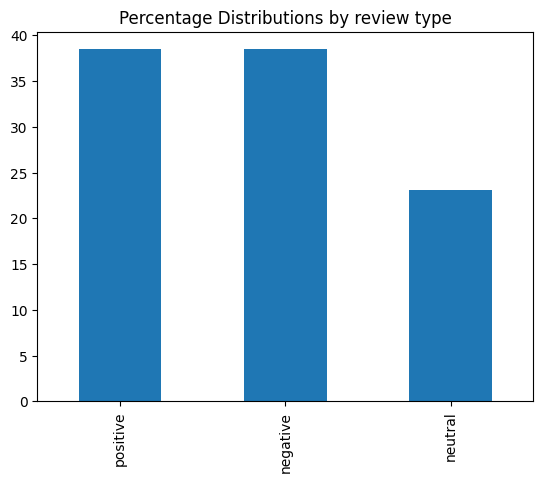

In [211]:
from ast import increment_lineno
%matplotlib inline
print('Percentage for default\n')
print(round(df.Sentiment.value_counts(normalize=True)*100,2))
round(df.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

The code provided displays the percentage distribution of sentiment categories ('positive', 'negative', 'neutral') in the 'Sentiment' column of the DataFrame. The printed output shows these percentages, and a bar plot visualizes the distribution of sentiment types using Matplotlib. In this case, it illustrates that 'positive' and 'negative' sentiments each represent 38.46%, while 'neutral' sentiment constitutes 23.08% of the data.

Model training

In [212]:
from sklearn.model_selection import train_test_split

# Assuming 'new' is the independent variable and 'Text' is the dependent variable
independent_var = df['cleaned_text_new']
dependent_var = df['Sentiment']

IV_train, IV_test, DV_train, DV_test = train_test_split(independent_var, dependent_var, test_size=0.1, random_state=225)

print('IV_train:', len(IV_train))
print('IV_test:', len(IV_test))
print('DV_train:', len(DV_train))
print('DV_test:', len(DV_test))

IV_train: 46
IV_test: 6
DV_train: 46
DV_test: 6


The code uses train_test_split to divide the dataset into training and testing sets for independent and dependent variables. It allocates 90% of the data for training (IV_train and DV_train) and 10% for testing (IV_test and DV_test). The printed outputs display the lengths of these training and testing sets for verification purposes.

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline


The code snippet imports modules for text vectorization (TfidfVectorizer), logistic regression modeling (LogisticRegression), and the Pipeline class from Scikit-learn. Although it creates instances for vectorization and logistic regression, it hasn't yet constructed a pipeline to combine these processes for sequential application.

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Creating a pipeline with TfidfVectorizer and LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using TfidfVectorizer for feature extraction
    ('clf', LogisticRegression(solver='lbfgs'))  # Logistic Regression classifier
])

The code snippet constructs a Scikit-learn pipeline by combining text vectorization (`TfidfVectorizer`) and logistic regression (`LogisticRegression`). This pipeline streamlines the process of converting text data to numerical features and applying logistic regression for classification in a sequential manner.

In [215]:
model = Pipeline([('vectorizer' , tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[2, 4],
       [0, 0]])

The confusion matrix output shows the model's classification performance. It indicates that the model correctly predicted 2 instances as positive sentiment but misclassified 4 instances as negative sentiment. There were no correct predictions for negative sentiment, and no instances were predicted as positive sentiment.

In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy :", accuracy_score(predictions, DV_test))
print("Precision :", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall :", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy : 0.3333333333333333
Precision : 1.0
Recall : 0.3333333333333333


The reported accuracy is 33.33%, indicating that the model correctly predicted 33.33% of the instances. The precision score of 100% implies that all positive predictions made by the model were accurate. However, the recall score of 33.33% suggests that the model identified only one-third of the actual positive instances present in the dataset. Overall, the model shows limited performance in correctly identifying positive sentiments.

In [217]:
example = ['good']
result = model.predict(example)

print(result)

['positive']


In [218]:
example = ['bad']
result = model.predict(example)

print(result)

['negative']


In [219]:
example = ['ever']
result = model.predict(example)

print(result)

['neutral']
